In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
bank=pd.read_csv('C:/Users/SUSHIL/Downloads/bank-fulls.csv',sep=";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank.drop(["marital","job","education","month"],inplace=True,axis=1)
bank.shape

(45211, 13)

In [4]:
bank=bank.dropna()
bank.shape

(45211, 13)

In [5]:
bank['outcome'] = bank.y.map({'no':0, 'yes':1})


In [6]:
bank

,age,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y,outcome
0,58,no,2143,yes,no,unknown,5,261,1,-1,0,unknown,no,0
1,44,no,29,yes,no,unknown,5,151,1,-1,0,unknown,no,0
2,33,no,2,yes,yes,unknown,5,76,1,-1,0,unknown,no,0
3,47,no,1506,yes,no,unknown,5,92,1,-1,0,unknown,no,0
4,33,no,1,no,no,unknown,5,198,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,cellular,17,977,3,-1,0,unknown,yes,1
45207,71,no,1729,no,no,cellular,17,456,2,-1,0,unknown,yes,1
45208,72,no,5715,no,no,cellular,17,1127,5,184,3,success,yes,1
45209,57,no,668,no,no,telephone,17,508,4,-1,0,unknown,no,0


In [7]:
bank['defaultss'] = bank.default.map({'no':0, 'yes':1})


In [8]:
bank

,age,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y,outcome,defaultss
0,58,no,2143,yes,no,unknown,5,261,1,-1,0,unknown,no,0,0
1,44,no,29,yes,no,unknown,5,151,1,-1,0,unknown,no,0,0
2,33,no,2,yes,yes,unknown,5,76,1,-1,0,unknown,no,0,0
3,47,no,1506,yes,no,unknown,5,92,1,-1,0,unknown,no,0,0
4,33,no,1,no,no,unknown,5,198,1,-1,0,unknown,no,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,cellular,17,977,3,-1,0,unknown,yes,1,0
45207,71,no,1729,no,no,cellular,17,456,2,-1,0,unknown,yes,1,0
45208,72,no,5715,no,no,cellular,17,1127,5,184,3,success,yes,1,0
45209,57,no,668,no,no,telephone,17,508,4,-1,0,unknown,no,0,0


In [9]:
bank['housingss'] = bank.housing.map({'no':0, 'yes':1})

In [10]:
bank['loanss'] = bank.loan.map({'no':0, 'yes':1})

In [18]:
bank

,age,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y,outcome,defaultss,housingss,loanss
0,58,no,2143,yes,no,unknown,5,261,1,-1,0,unknown,no,0,0,1,0
1,44,no,29,yes,no,unknown,5,151,1,-1,0,unknown,no,0,0,1,0
2,33,no,2,yes,yes,unknown,5,76,1,-1,0,unknown,no,0,0,1,1
3,47,no,1506,yes,no,unknown,5,92,1,-1,0,unknown,no,0,0,1,0
4,33,no,1,no,no,unknown,5,198,1,-1,0,unknown,no,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,cellular,17,977,3,-1,0,unknown,yes,1,0,0,0
45207,71,no,1729,no,no,cellular,17,456,2,-1,0,unknown,yes,1,0,0,0
45208,72,no,5715,no,no,cellular,17,1127,5,184,3,success,yes,1,0,0,0
45209,57,no,668,no,no,telephone,17,508,4,-1,0,unknown,no,0,0,0,0


In [23]:
x=bank.iloc[:,[0,2,6,7,8,15,16,14]]
y=bank.iloc[:,13]
classifier=LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [24]:
y_pred=classifier.predict_proba(x)

In [25]:
y_pred

array([[0.95127409, 0.04872591],
       [0.9543545 , 0.0456455 ],
       [0.96915189, 0.03084811],
       ...,
       [0.42436922, 0.57563078],
       [0.80912301, 0.19087699],
       [0.72826215, 0.27173785]])

In [28]:
y_pred=classifier.predict(x)

In [29]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y,y_pred)
print(confusion_matrix)

[[39177   745]
 [ 4349   940]]


In [32]:
accuracy=((39177+940)/(39177+745+4349+745))*100

In [33]:
accuracy

89.11720277234761

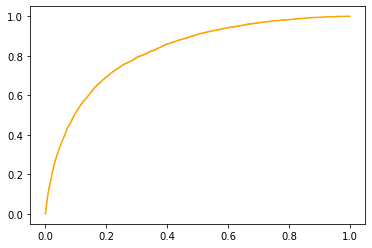

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])

auc=roc_auc_score(y,y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='orange',label='logit model(area=%0.2f)'%auc)
plt.show()




In [39]:
auc

0.5795329844795005